In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder


In [7]:
insurance=pd.read_csv('insurance.csv')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [10]:
categorical_columns=['sex','smoker','region',]

data_encoded=pd.get_dummies(insurance,columns=categorical_columns,drop_first=True)

In [11]:
median_charges=data_encoded['charges'].median()
data_encoded['charges_class']=np.where(data_encoded['charges']>median_charges,1,0)


In [12]:
X=data_encoded.drop(['age','charges_class'],axis=1)
Y=data_encoded['charges_class']

In [13]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
y_pred=model.predict(X_test)

In [16]:
print(y_pred)

[0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 1]


In [17]:
accuracy=accuracy_score(Y_test,y_pred)
conf_matrix=confusion_matrix(Y_test,y_pred)
class_report=classification_report(Y_test,y_pred)



In [18]:
print("\n\naccuracy_score",accuracy)
print("\n\nConfusion Matrix:",conf_matrix)
print("\n\nclassification_report",class_report)



accuracy_score 0.996268656716418


Confusion Matrix: [[145   1]
 [  0 122]]


classification_report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       146
           1       0.99      1.00      1.00       122

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



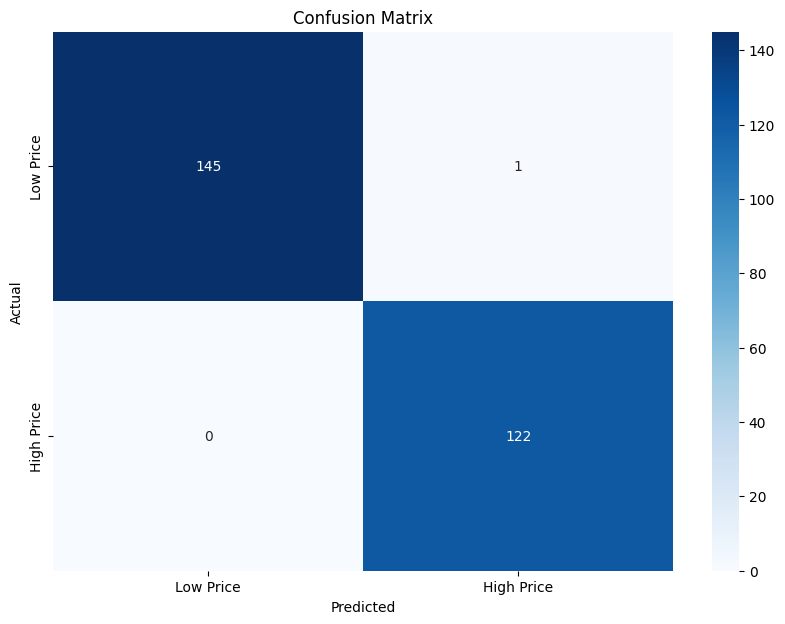

In [19]:
plt.figure(figsize=[10,7])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Low Price','High Price'],yticklabels=['Low Price','High Price'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
